In [1]:
import napari
napari.__version__

'0.4.15'

In [2]:
#header: imports and define viewer layout
from napari.settings import get_settings
import time
import napari
from napari._qt.qthreading import thread_worker
from skimage import data
from skimage.morphology import ball, octahedron
import matplotlib.pyplot as plt


def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash=False)
    plt.imshow(img)
    plt.axis("off")
    plt.show()


get_settings().application.window_position = (600, 600)
viewer = napari.Viewer()
viewer.window.resize(900, 600)
viewer.window._qt_viewer.dockLayerControls.toggleViewAction().trigger()
viewer.window._qt_viewer.dockLayerList.toggleViewAction().trigger()

viewer.theme = "light"
viewer.dims.ndisplay = 3
viewer.axes.visible = True
viewer.axes.colored = False
viewer.axes.labels = False
viewer.text_overlay.visible = True
viewer.text_overlay.text = "Hello World!"


In [3]:
# define data and update loop 
myblob = data.binary_blobs(
    length=200, volume_fraction=0.1, blob_size_fraction=0.3, n_dim=3, seed=42
)
myoctahedron = octahedron(100)
myball = ball(100)

files = {
    "blob": myblob,
    "ball": myball,
    "octahedron": myoctahedron,
}

viewer.add_labels(myball, name="result")
viewer.camera.angles = (19, -33, -121)
viewer.camera.zoom = 1.3


@thread_worker
def loop_run():
    for key in files:
        time.sleep(0.5)
        image = files[key]
        yield (image, key)


def update_layer(image_text_tuple):
    image, text = image_text_tuple
    viewer.layers["result"].data = image
    viewer.layers["result"].opacity = 1
    viewer.text_overlay.text = text
    make_screenshot(viewer)


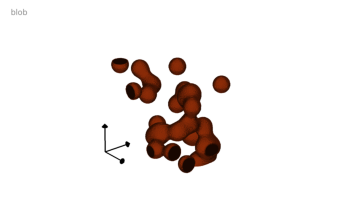

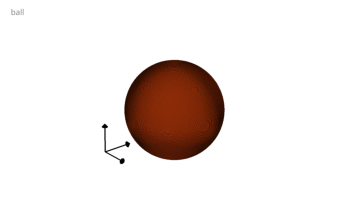

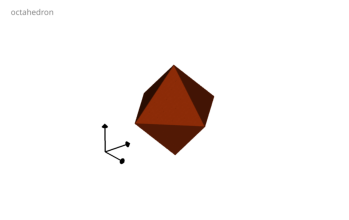

In [4]:
# start loop
worker = loop_run()
worker.yielded.connect(update_layer)
worker.start()